https://www.kaggle.com/datasets/tobiaswee/service-sales-dataset?resource=download

In [1]:
#Imported all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
pd.set_option('display.max_columns', None)

In [2]:
#Imported the data into a df
df = pd.read_csv(r"C:\Users\Paraplanner2\Downloads\Portfolio project 1\dataset.csv", sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
#Checked info to see the data types, rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#Checked if there were any null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
#Checked for any duplicates
df.duplicated().sum()

12

In [6]:
#Dealt with the duplicated data
df.drop_duplicates(inplace = True)

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
#Defined the bins for age and the labels to have a clear understanding of what the majority age group is
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]  
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'] 

#Created a new column that will be used for grouping 
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
age_group_counts = df['age_group'].value_counts()

In [9]:
#Made a list of all the variables distributions I wanted to see against the target variable
dist = ['age_group', 'education', 'job', 'housing']

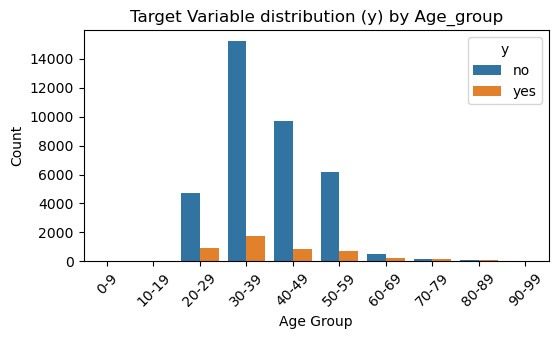

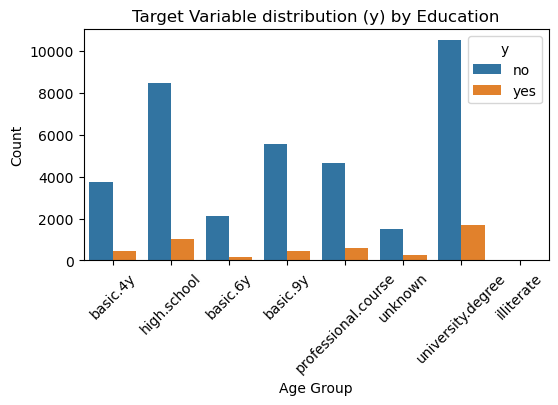

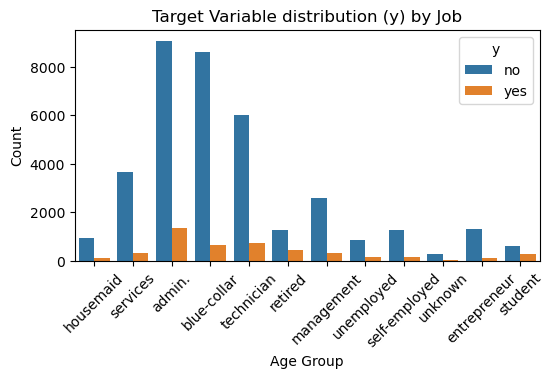

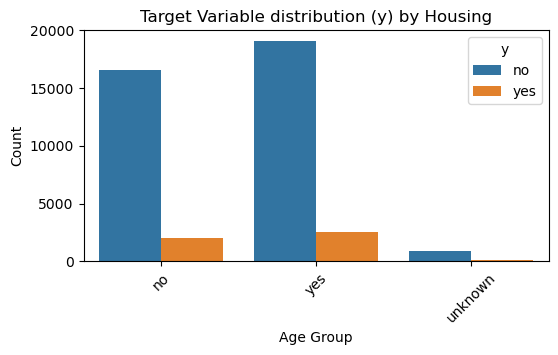

In [10]:
#Made a plot to compare age groups and the target variable
for i in dist:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=i, hue='y')
    plt.title(f'Target Variable distribution (y) by {i.capitalize()}')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
#Created a list of all the columns I want to see the value count for
s = ['age_group', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'poutcome', 'cons.conf.idx', 'y',]

In [12]:
#Used a for Loop to loop through the selected columns to see the value_count
for col in s:
    print(f"The count of {col}")
    print(df[col].value_counts())
    print()

The count of age_group
age_group
30-39    16933
40-49    10523
50-59     6861
20-29     5592
60-69      724
70-79      318
80-89      140
10-19       75
90-99       10
0-9          0
Name: count, dtype: int64

The count of job
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

The count of marital
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

The count of education
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

The count of default
default
no         32577


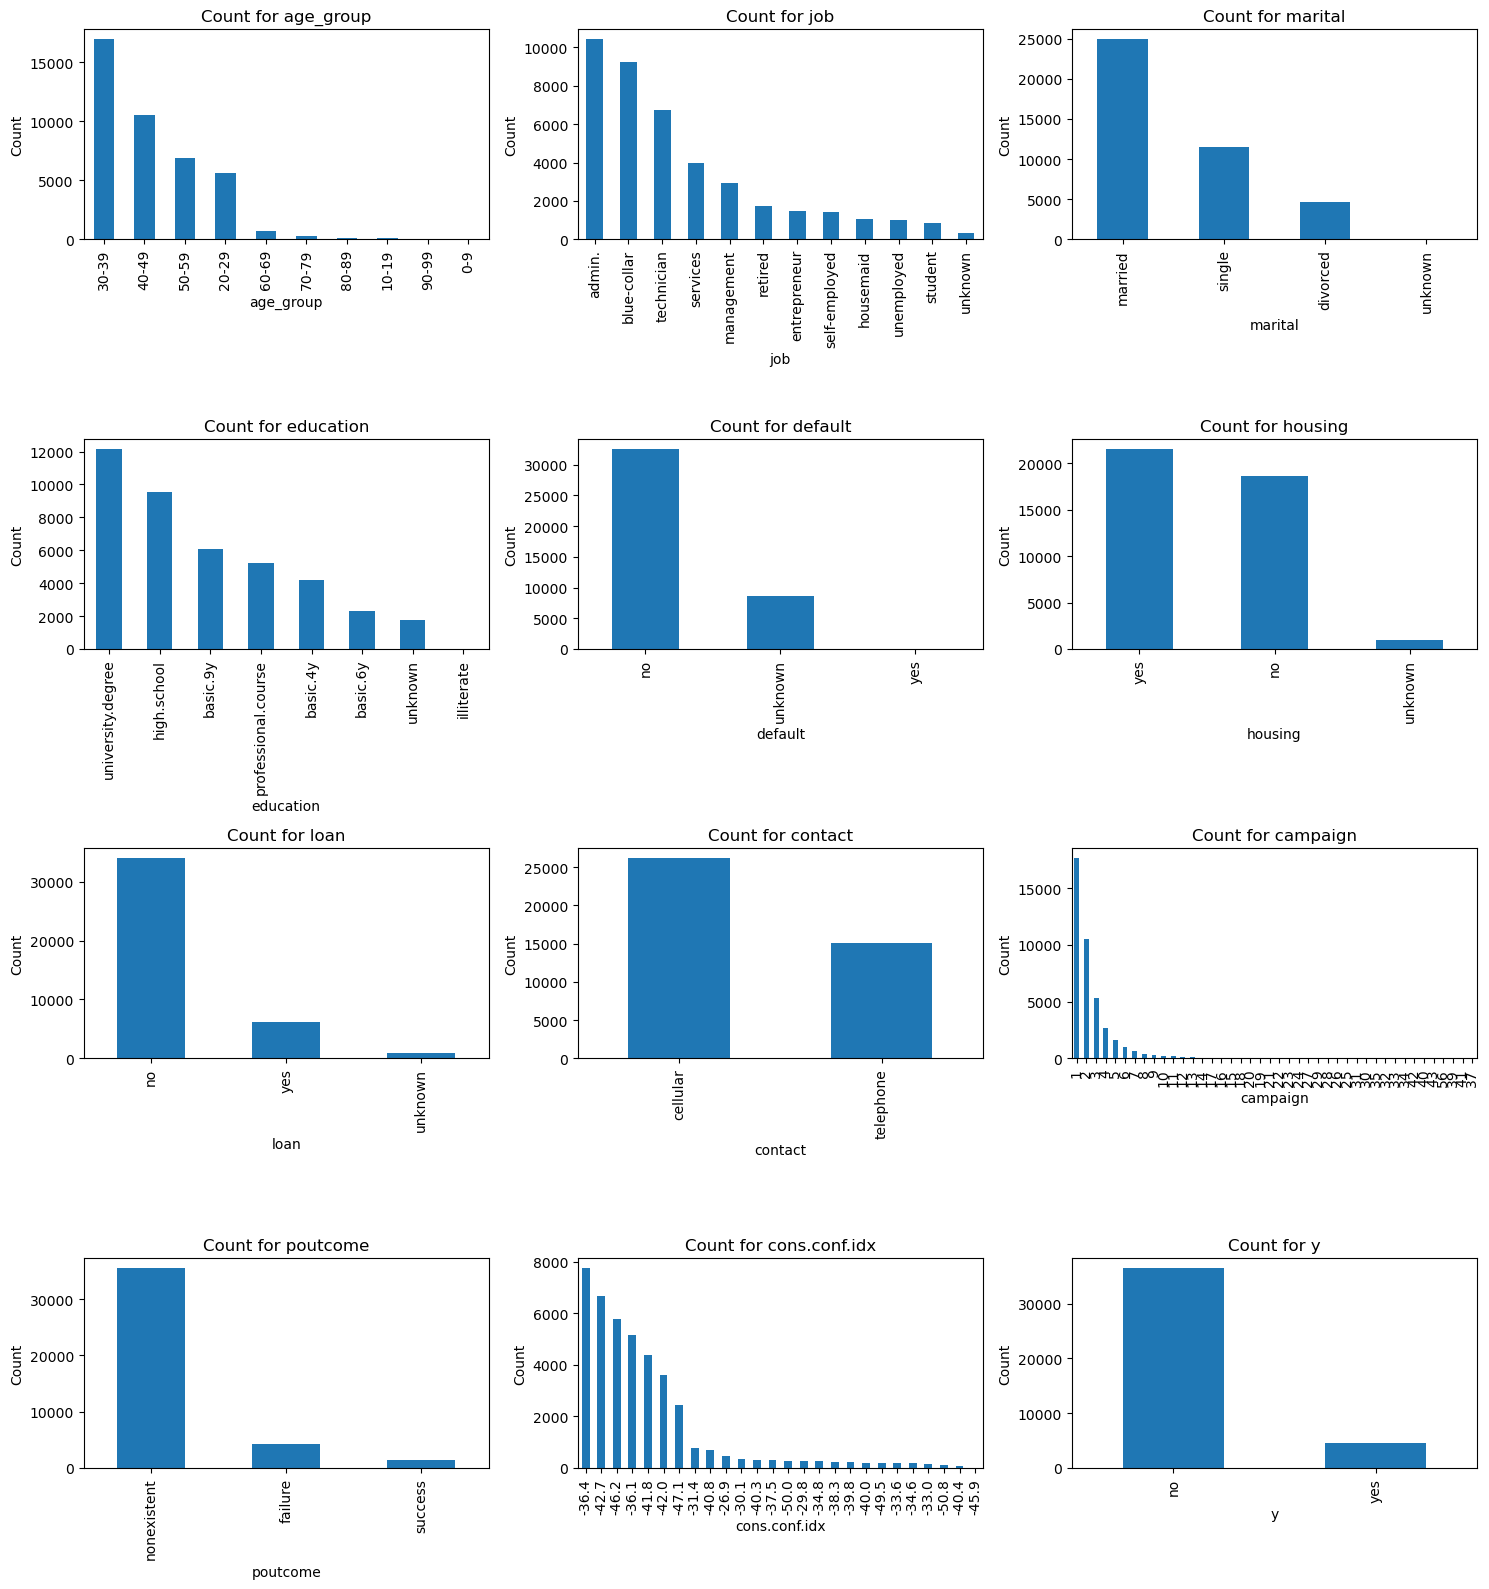

In [13]:
#Visualised the value count of a few of the columns in order to have an idea of what is going on
num_cols = len(s)
num_rows = 4
num_columns = (num_cols + num_rows - 1) // num_rows  # Calculate columns to ensure even distribution
fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(s):
    df[col].value_counts().plot(kind='bar', ax=axes[i], title=f"Count for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()

# Preprocessing and Model Training

In [14]:
#Checking how many 'unknowns' they are in default and if the column is needed as there are so many unknowns
df['default'].value_counts(normalize = True)*100

default
no         79.116476
unknown    20.876239
yes         0.007286
Name: proportion, dtype: float64

In [15]:
#Checked if there is any imbalance in the target column
df['y'].value_counts(normalize = True)*100

y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

In [16]:
#Performed the chi-square test to check if the p-value is below 0.05 and if we can remove the 'default' column
from scipy.stats import chi2_contingency

#Created a contingency table
contingency_table = pd.crosstab(df['default'], df['y'])

#Performed the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 406.5560941574606, p-value: 5.2175408937279634e-89


The p-value is much smaller than the typical significance level of 0.05, this suggests a significant association between the default column and the target variable y.

In [17]:
#Created a list of all the columsn that have categorical data 
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

In [18]:
# Made use of the Label Encoder to transform the categorical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in cat_columns:
    df[i] = label_encoder.fit_transform(df[i])

In [19]:
#Checking if the categorical columns have been transformed
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,50-59
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,50-59
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,30-39
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,40-49
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,50-59


In [20]:
#Dropped 'age_group' column we created as age column already there
df.drop('age_group', axis = 1, inplace = True)

In [21]:
#Split the data into training and testing
X = df.drop('y', axis = True)
y = df['y']

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size = 0.2, random_state = 42,)

In [22]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Made use of class_weight balance as there is imbalance in the data. This method is sufficient for the imbalance percentage but other methods can be used such a SMOTE. 


Logistic Regression Results:
Accuracy: 0.8518698397280233
Confusion Matrix:
[[6172 1093]
 [ 127  844]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7265
           1       0.44      0.87      0.58       971

    accuracy                           0.85      8236
   macro avg       0.71      0.86      0.75      8236
weighted avg       0.92      0.85      0.87      8236



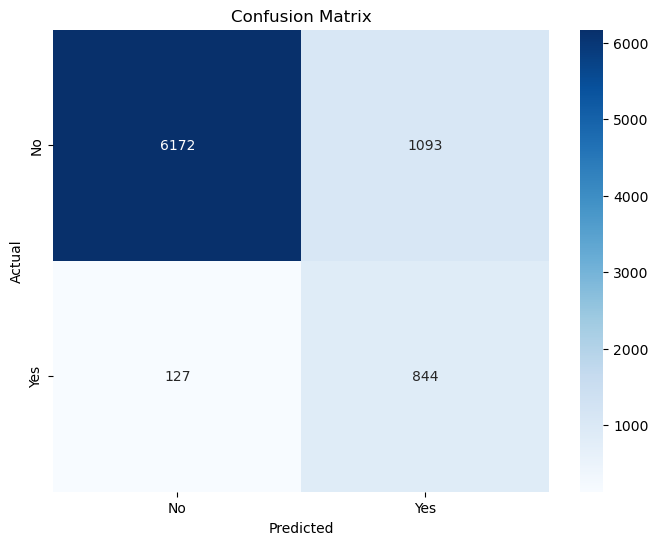


Gradient Boosting Results:
Accuracy: 0.9140359397765906
Confusion Matrix:
[[7032  233]
 [ 475  496]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7265
           1       0.68      0.51      0.58       971

    accuracy                           0.91      8236
   macro avg       0.81      0.74      0.77      8236
weighted avg       0.91      0.91      0.91      8236



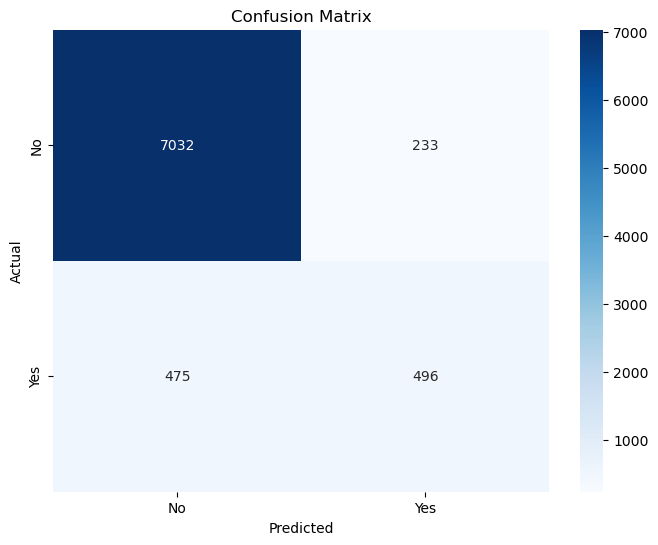


Random Forest Results:
Accuracy: 0.90808644973288
Confusion Matrix:
[[7061  204]
 [ 553  418]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.67      0.43      0.52       971

    accuracy                           0.91      8236
   macro avg       0.80      0.70      0.74      8236
weighted avg       0.90      0.91      0.90      8236



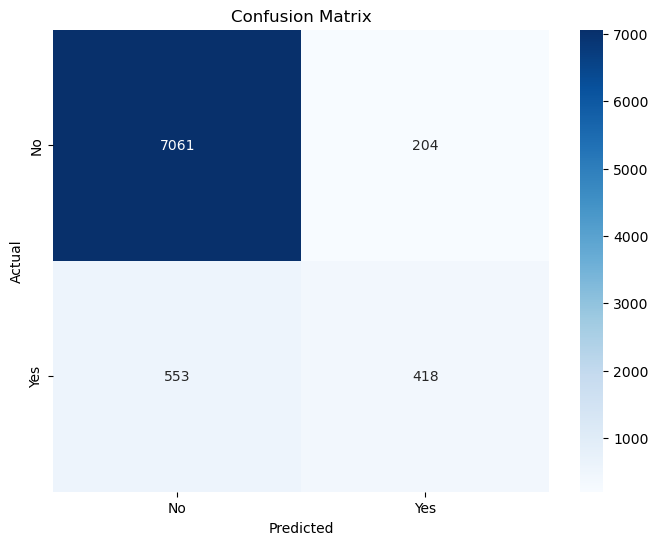

[LightGBM] [Info] Number of positive: 3668, number of negative: 29272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

LGBM Results:
Accuracy: 0.8727537639630889
Confusion Matrix:
[[6301  964]
 [  84  887]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      7265
           1       0.48      0.91      0.63       971

    accuracy                           0.87      8236
   macro avg       0.73      0.89      0.78      8236
weighted avg       0.93      0.87      0.89      8236



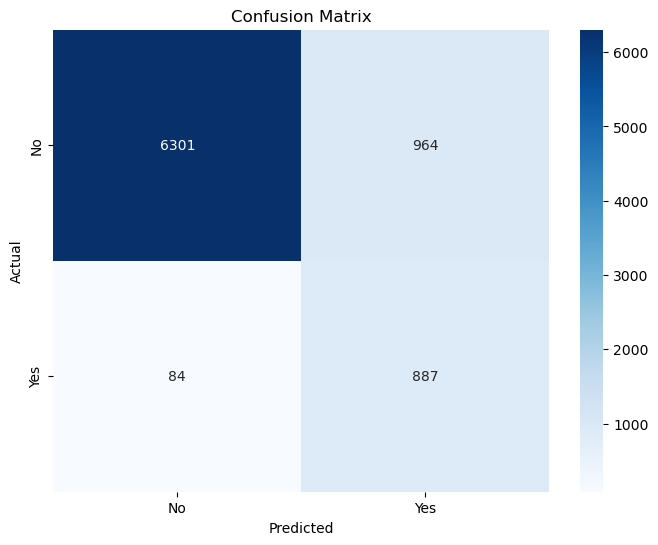

In [23]:
#Selected four different classification models that will be used for our predictions
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'LGBM' : lgb.LGBMClassifier(boosting_type='gbdt', class_weight= 'balanced')
}


#Creating a for loop to loop over each model in the dictionary 
for model_name, model in models.items():
    #Fit the model
    model.fit(X_train, y_train)
    
    #Made predictions
    y_pred = model.predict(X_test)  
    
    #Evaluated the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    #Print the results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    
    #Plot the confusion matrix for each model in the loop
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()